In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [132]:
df = pd.read_csv('../data/processed/cleaned_data.csv')

In [133]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,log_price
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,12.653962
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,14.684291
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,12.742569
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,12.948012
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,13.217675


In [134]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=['number']).columns.tolist()

print(f"Numeric columns: {(num_cols)}")
print(f"Categorical columns: {(cat_cols)}")


Numeric columns: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'log_price']
Categorical columns: ['date', 'street', 'city', 'statezip', 'country']


In [135]:
df['statezip']

0       WA 98133
1       WA 98119
2       WA 98042
3       WA 98008
4       WA 98052
          ...   
4595    WA 98133
4596    WA 98007
4597    WA 98059
4598    WA 98178
4599    WA 98042
Name: statezip, Length: 4600, dtype: object

In [136]:
df[['state', 'zipcode']] = df['statezip'].str.split(' ', expand=True)

In [137]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,log_price,state,zipcode
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,12.653962,WA,98133
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,14.684291,WA,98119
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,12.742569,WA,98042
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,12.948012,WA,98008
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,13.217675,WA,98052


In [138]:
df['state'].nunique()

1

In [139]:
df['zipcode'].nunique()

77

In [140]:
df['country'].nunique()

1

In [141]:
df['street'].nunique()

4525

In [142]:
df['city'].nunique()

44

In [143]:
df['date'].nunique()

70

In [144]:
features_to_drop = ['country', 'street', 'state', 'statezip', 'date']

In [145]:
df_with_dropped_features = df.drop(columns=features_to_drop)
df_with_dropped_features.to_csv('../data/processed/cleaned_with_dropped_features.csv', index=False)

In [146]:
df_with_dropped_features.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,log_price,zipcode
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,12.653962,98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,14.684291,98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,12.742569,98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,12.948012,98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,13.217675,98052


In [147]:
freq_encoding = df_with_dropped_features['zipcode'].value_counts().to_dict()
df_with_dropped_features['zipcode_freq'] = df_with_dropped_features['zipcode'].map(freq_encoding)


In [148]:
freq_encoding = df_with_dropped_features['city'].value_counts().to_dict()
df_with_dropped_features['city_freq'] = df_with_dropped_features['city'].map(freq_encoding)

In [149]:
df_with_dropped_features.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,log_price,zipcode,zipcode_freq,city_freq
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,12.653962,98133,93,123
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,14.684291,98119,49,1573
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,12.742569,98042,100,185
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,12.948012,98008,50,286
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,13.217675,98052,135,235


In [150]:
# df_with_dropped_features.drop(['city', 'zipcode'], axis=1, inplace=True)

In [151]:
drop_city_zipcode = ['city', 'zipcode']

In [152]:
new_housing_dataset = df_with_dropped_features.drop(columns=drop_city_zipcode)
new_housing_dataset.to_csv('../data/processed/data_processed_housing_dataset.csv', index=False)

In [153]:
new_housing_dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,log_price,zipcode_freq,city_freq
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,12.653962,93,123
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,14.684291,49,1573
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,12.742569,100,185
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,12.948012,50,286
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,13.217675,135,235


In [154]:
num_cols = new_housing_dataset.select_dtypes(include=np.number).columns.tolist()
cat_cols = new_housing_dataset.select_dtypes(exclude=['number']).columns.tolist()

print(f"Numeric columns: {(num_cols)}")
print(f"Categorical columns: {(cat_cols)}")


Numeric columns: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'log_price', 'zipcode_freq', 'city_freq']
Categorical columns: []


In [155]:
new_housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  log_price      4600 non-null   float64
 14  zipcode_freq   4600 non-null   int64  
 15  city_freq      4600 non-null   int64  
dtypes: float64(5), int64(11)
memory usage: 575.1 KB


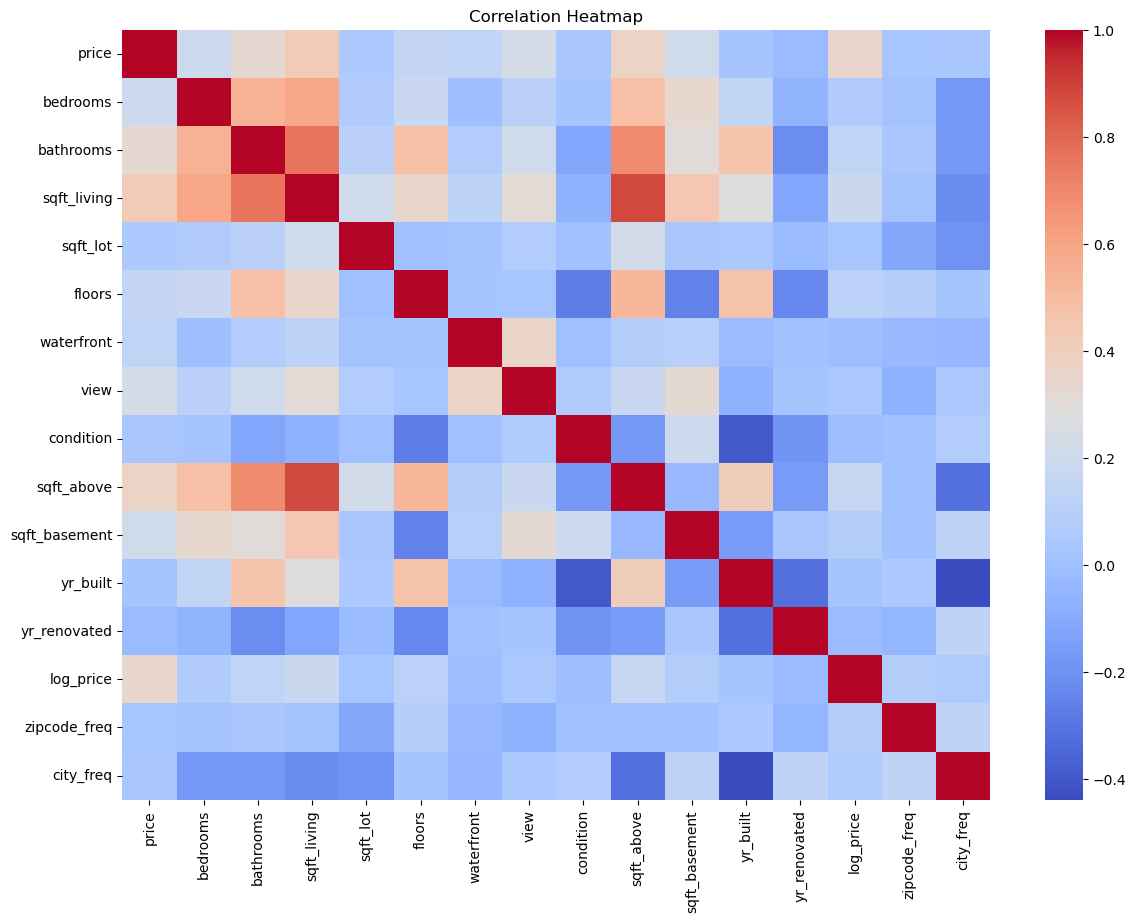

In [156]:
plt.figure(figsize=(14, 10))
corr = new_housing_dataset.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.savefig("../reports/correlation_matrix_after_preprocessing.png")
plt.show()

In [157]:
top_corr = corr['price'].sort_values(ascending=False).head(11)[1:]
print("\nTop Features Correlated with Price:")
print(top_corr)


Top Features Correlated with Price:
sqft_living      0.430410
sqft_above       0.367570
log_price        0.345902
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
Name: price, dtype: float64
